In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 + (point1[2] - point2[2]) ** 2)

In [4]:
def initialize_population(pop_size, num_points):
    population = []
    for _ in range(pop_size):
        chromosome = np.random.permutation(num_points)
        population.append(chromosome)
    return population

In [5]:
def fitness(chromosome, points):
    total_distance = 0
    origin = points[0]  
    current_point = origin
    for index in chromosome:
        next_point = points[index + 1] 
        total_distance += calculate_distance(current_point, next_point)
        current_point = next_point
    total_distance += calculate_distance(current_point, origin)
    fitness = 1 / (1 + total_distance) 
    return fitness

In [6]:
def tournament_selection(population, fitness_scores, tournament_size=3):
    tournament = np.random.choice(len(population), tournament_size, replace=False)
    tournament_fitness = [fitness_scores[i] for i in tournament]
    winner_index = tournament[np.argmax(tournament_fitness)]
    return population[winner_index]

In [7]:
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(np.random.choice(range(size), 2, replace=False))  
    offspring = np.empty(size, dtype=parent1.dtype)
    offspring[start:end] = parent1[start:end]  
    fill_values = [item for item in parent2 if item not in offspring[start:end]]
    offspring[:start] = fill_values[:start]
    offspring[end:] = fill_values[start:]
    return offspring


In [8]:
def mutate(chromosome, mutation_rate):
    size = len(chromosome)
    for _ in range(int(size * mutation_rate)):
        idx1, idx2 = np.random.choice(size, 2, replace=False)
        chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
    return chromosome


In [14]:
def genetic_algorithm(points, pop_size, num_generations, mutation_rate):
    num_points = len(points) - 1  
    population = initialize_population(pop_size, num_points)
    best_solution = None
    best_fitness = float('-inf')
    generation_data = []


    for generation in range(num_generations):
        fitness_scores = [fitness(chromo, points) for chromo in population]
        generation_best_fitness = max(fitness_scores)
        if generation_best_fitness > best_fitness:
            best_fitness = generation_best_fitness
            best_solution = population[fitness_scores.index(best_fitness)]

        new_population = []
        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, fitness_scores)
            parent2 = tournament_selection(population, fitness_scores)
            offspring = crossover(parent1, parent2)
            offspring = mutate(offspring, mutation_rate)
            new_population.append(offspring)

        population = new_population
        min_fitness = min(fitness_scores)
        max_fitness = max(fitness_scores)
        mean_fitness = np.mean(fitness_scores)
        
        
        
        generation_data.append({
            "Generation": generation,
            "Min Fitness": min_fitness,
            "Max Fitness": max_fitness,
            "Mean Fitness": mean_fitness,
        })
    
        
    df = pd.DataFrame(generation_data)
    df.to_csv("generation_data.csv", index=False)

    return best_solution, best_fitness, df

            Min Fitness  Max Fitness  Mean Fitness  Std Fitness
Generation                                                     
0              0.007165     0.009531      0.008821          NaN
1              0.007165     0.009531      0.009318          NaN
2              0.007165     0.009531      0.009507          NaN
3              0.009531     0.009531      0.009531          NaN
4              0.009531     0.009531      0.009531          NaN
...                 ...          ...           ...          ...
95             0.009531     0.009531      0.009531          NaN
96             0.009531     0.009531      0.009531          NaN
97             0.009531     0.009531      0.009531          NaN
98             0.009531     0.009531      0.009531          NaN
99             0.009531     0.009531      0.009531          NaN

[100 rows x 4 columns]


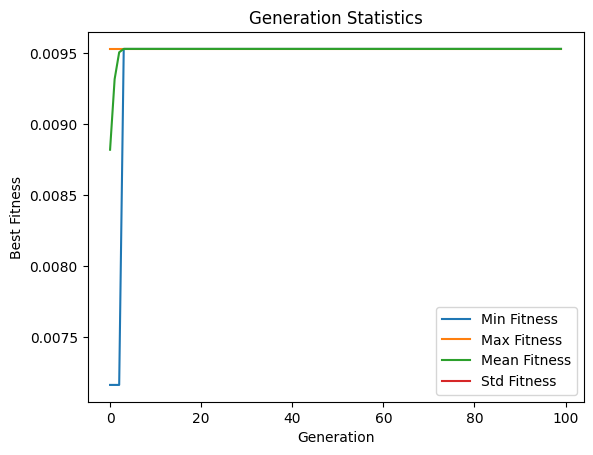

In [18]:
points_example = [(0,0,0), (10,10,10), (20,20,20), (30,30,30)]  

best_solution, best_fitness, df = genetic_algorithm(
    points=points_example, pop_size=100, num_generations=100, mutation_rate=0.01
)

stats_df = df.groupby('Generation').agg({
    'Min Fitness': 'min',
    'Max Fitness': 'max',
    'Mean Fitness': 'mean'
})

stats_df['Std Fitness'] = df.groupby('Generation')['Mean Fitness'].transform('std')

print(stats_df)

stats_df.plot(kind='line')
plt.title('Generation Statistics')
plt.ylabel('Best Fitness')
plt.show()